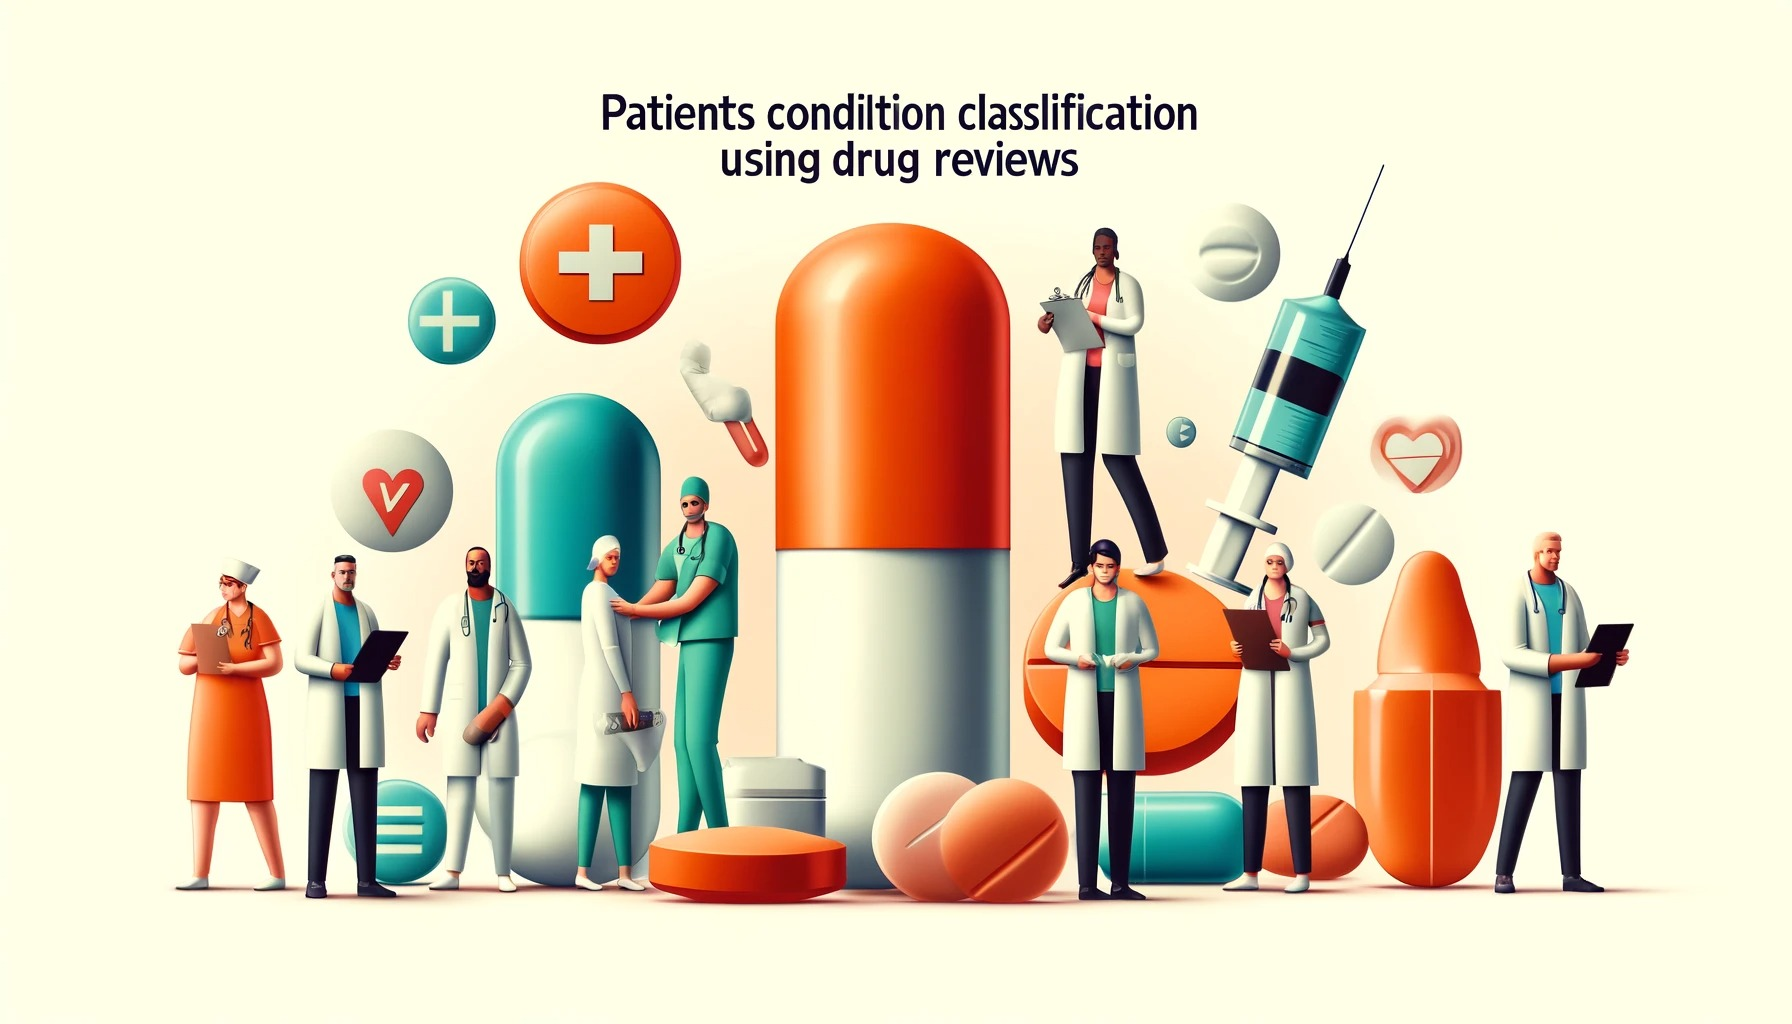

# import libraries

In [2]:
import pandas as pd  # data preprocessing
import itertools  # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [3]:

df = pd.read_excel(r"C:\Users\Hamidreza\OneDrive\Desktop\Patient Condition Classification\Dataset\train dataset\Train-Dataset_x.xlsx")

# Now you can check the first few rows to ensure it's read correctly
df.head()


uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9 2012-05-20   
1  "My son is halfway through his fourth week of ...       8 2010-04-27   
2  "I used to take another oral contraceptive, wh...       5 2009-12-14   
3  "This is my first time using any form of birth...       8 2015-11-03   
4  "Suboxone has completely turned my life around...       9 2016-11-27   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [25]:
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

In [4]:
# describing the data

df.describe()

uniqueID         rating    usefulCount
count  161296.000000  161296.000000  161296.000000
mean   115922.969689       6.994364      28.004210
std     67004.196719       3.272336      36.403196
min         2.000000       1.000000       0.000000
25%     58062.750000       5.000000       6.000000
50%    115743.500000       8.000000      16.000000
75%    173774.500000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

In [27]:
# checking if the data contains any NULL values

df.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

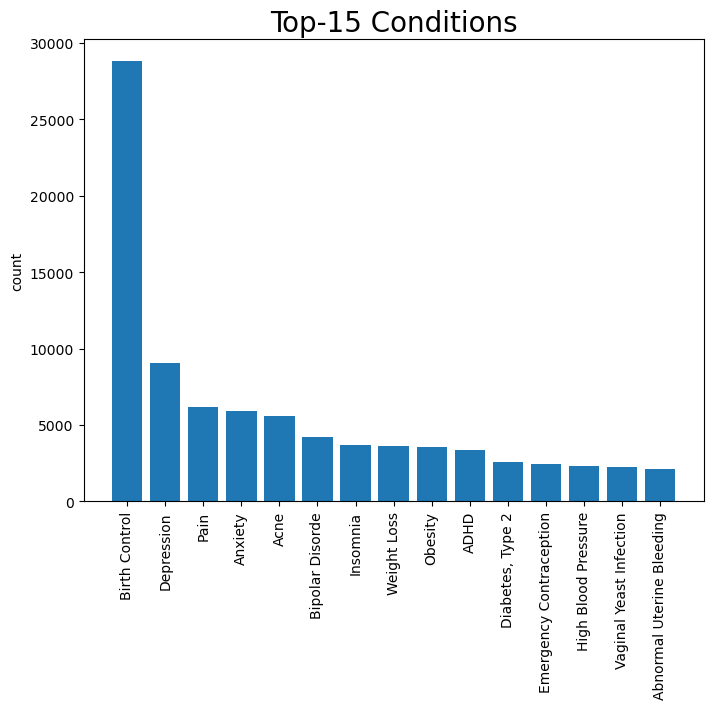

In [5]:
#plot a bargraph to check top 15 conditions
plt.figure(figsize=(8,6))
conditions = df['condition'].value_counts(ascending = False).head(15)

plt.bar(conditions.index,conditions.values)
plt.title('Top-15 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

### We consider only 4 conditions out of 884 different conditions for our analysis, which are 'Birth Control', 'High Blood Pressure', 'Depression'  and 'Diabetes Type2'.

In [6]:
# Filter the DataFrame to only keep the records with the specified conditions

df_train = df[(df['condition'] == 'Birth Control') | (df['condition'] == 'Depression') | (df['condition'] == 'High Blood Pressure') | (df['condition'] =='Diabetes, Type 2')]

In [7]:
df.shape

(161296, 7)

In [8]:
df_train.shape

(42732, 7)

In [9]:
print(df_train.columns)

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


In [10]:
# Define the conditions to keep

X = df_train.drop(['drugName', 'rating', 'date', 'usefulCount', 'uniqueID'], axis=1)


In [11]:
X.head(5)

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

# EDA

In [12]:
X.condition.value_counts()

Birth Control          28788
Depression              9069
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: condition, dtype: int64

In [13]:
#check number of unique values in condition
print(X['condition'].nunique())

4


In [14]:
# segregating dataframe for analyzing individual condition
X_birth = X[(X['condition'] == 'Birth Control')]
X_dep = X[(X['condition'] == 'Depression')]
X_bp = X[(X['condition'] == 'High Blood Pressure')]
X_diab = X[(X['condition'] == 'Diabetes, Type 2')]

In [12]:
!pip install wordcloud


Text(0.5, 1.0, 'Word cloud for Birth control')

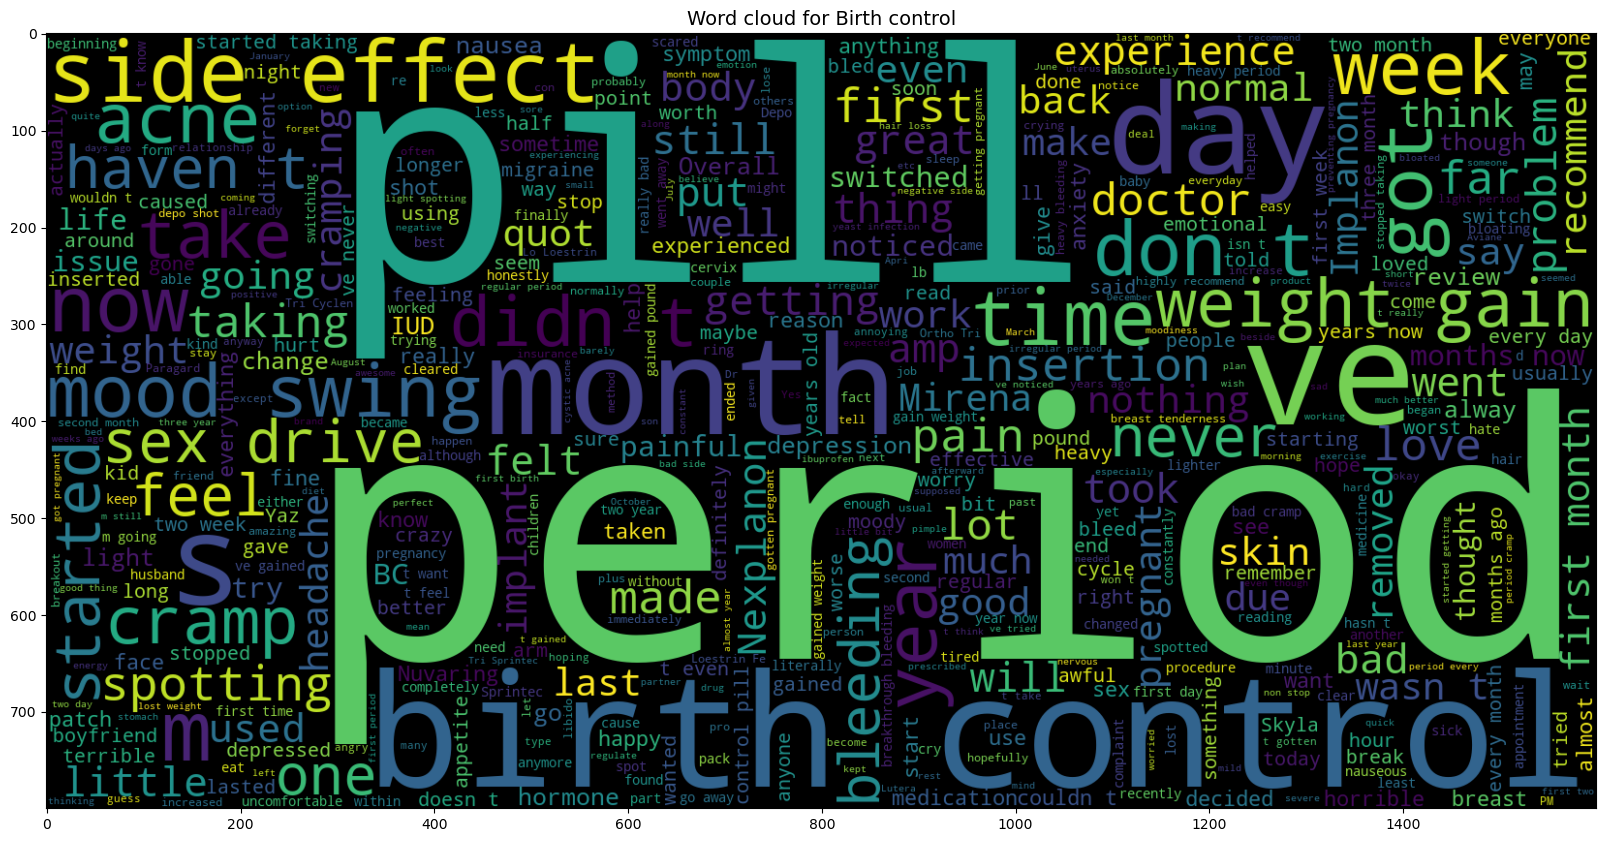

In [361]:
from wordcloud import WordCloud
plt.figure(figsize=(20, 20))  
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_birth.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Birth control', fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

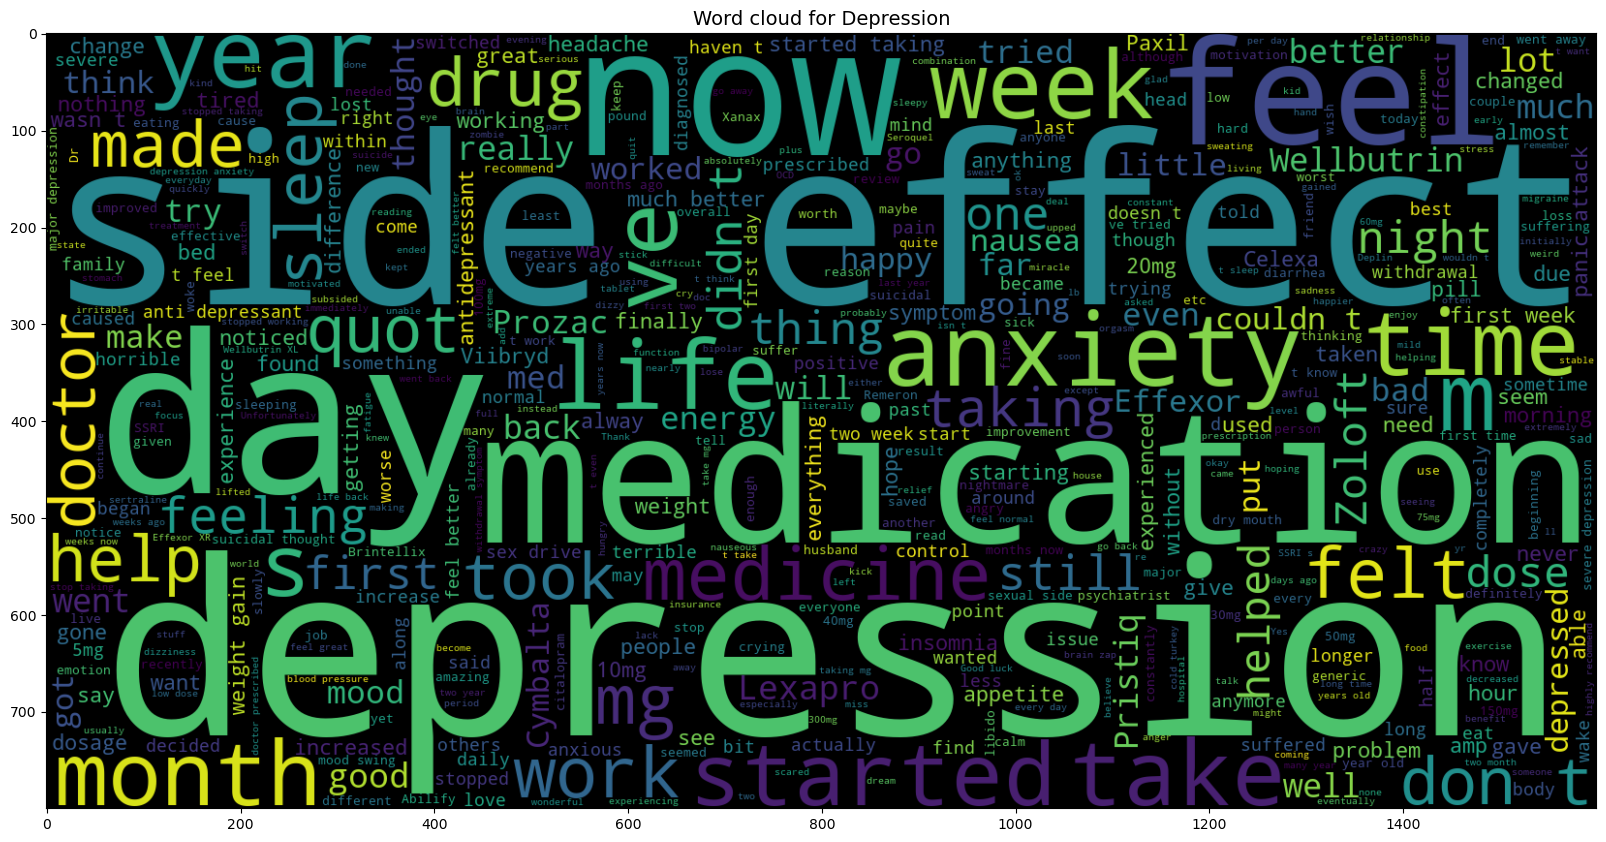

In [131]:
plt.figure(figsize=(20, 20))  
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_dep.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Depression', fontsize=14)

Text(0.5, 1.0, 'Word cloud for Blood Pressure')

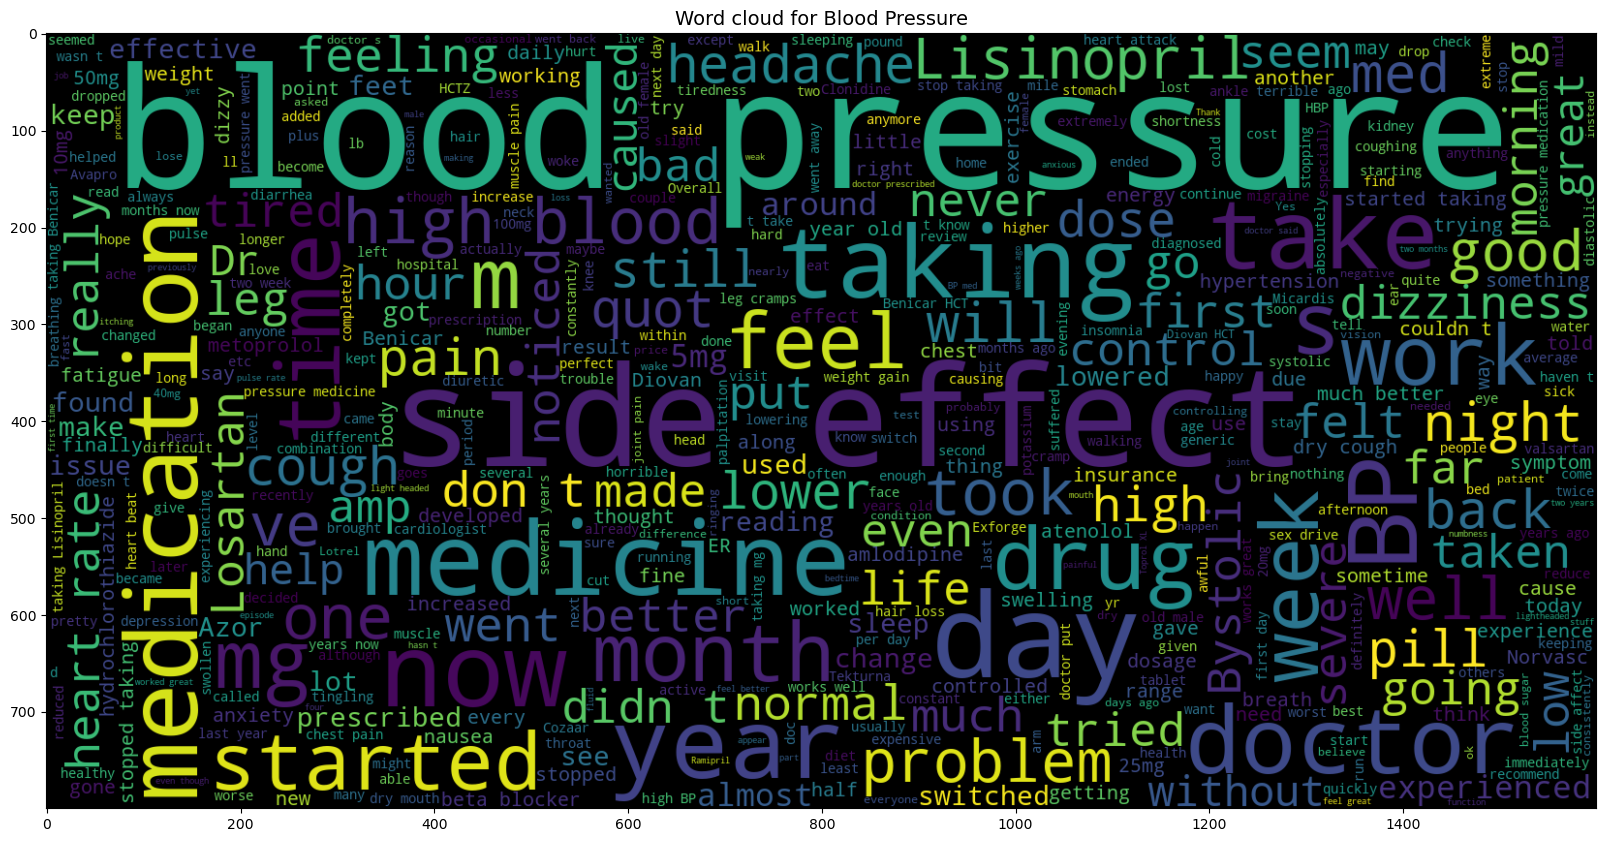

In [362]:
plt.figure(figsize=(20, 20))  
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_bp.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Blood Pressure', fontsize=14)

Text(0.5, 1.0, 'Word cloud for Diabetes')

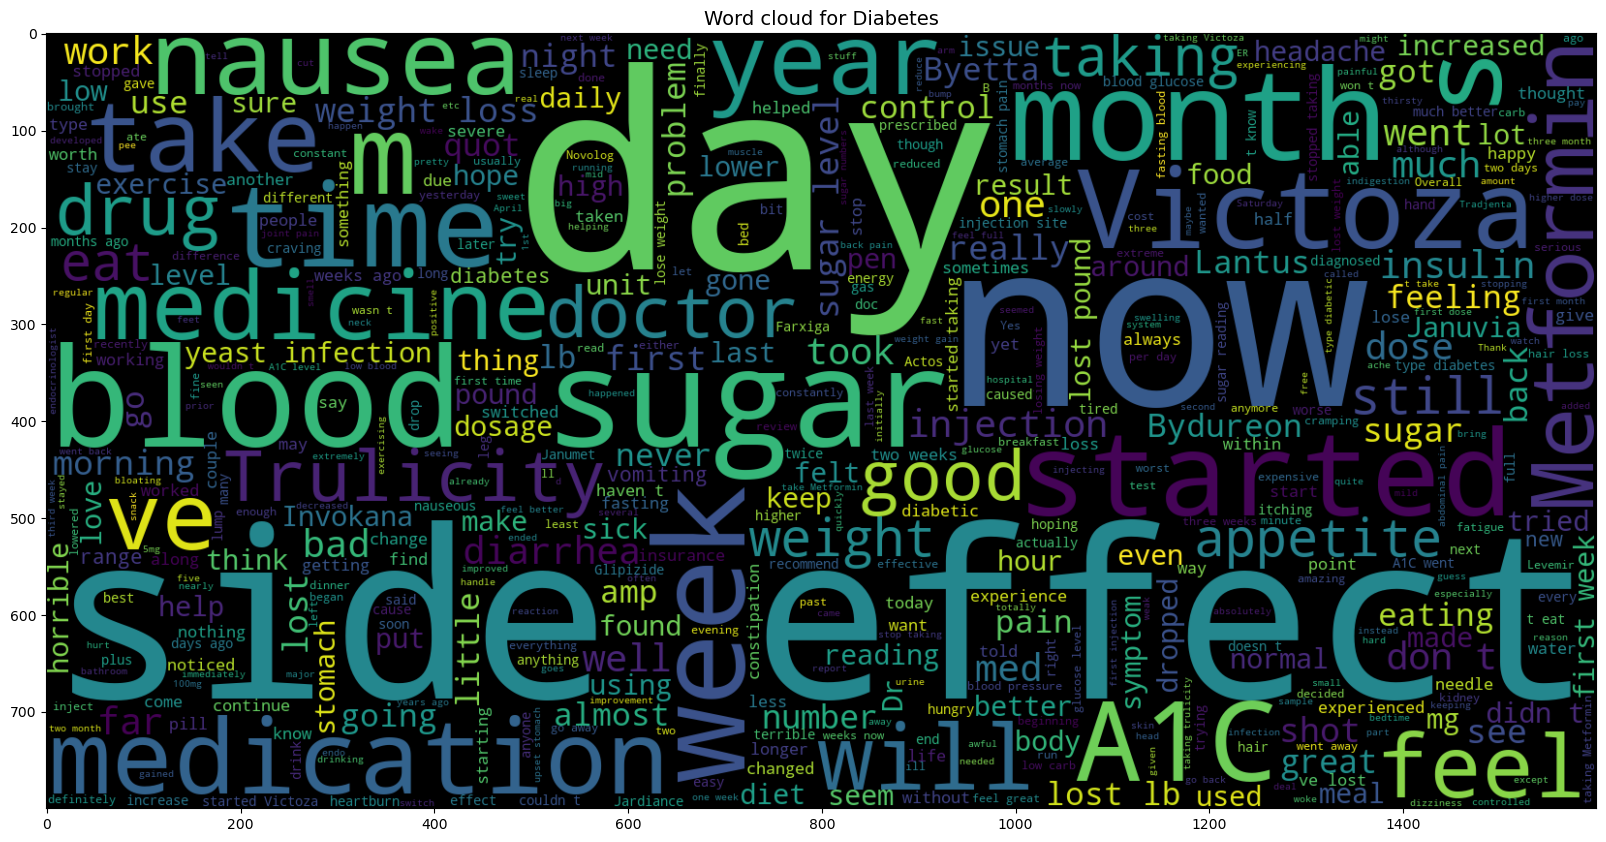

In [364]:
plt.figure(figsize=(20, 20))  
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_diab.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Diabetes', fontsize=14)

# Data Preprocessing

In [15]:
print(X.index)


Int64Index([     2,      3,      9,     11,     14,     22,     31,     44,
                50,     59,
            ...
            161262, 161264, 161268, 161269, 161271, 161273, 161278, 161286,
            161290, 161291],
           dtype='int64', length=42732)


In [16]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge._x000D_\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [22]:
X['review'][161273]

'"I have had the Nexplanon since Dec. 27, 2016 \r\r\nI got my first period at the end of January and it lasted about a month and a half. In March of 2017 I didn&#039;t bleed for close to three weeks and then started bleeding again March 28th and have been bleeding every since. I have gained about 13 lbs so far since getting the birth control. Although for now the weight gain isn&#039;t a deal breaker for me but the bleeding is..  I am trying to be very patient to see how my body adjusts to the implant. It has been three months so far and I have my fingers crossed that my cycle will go away for awhile."'

In [17]:
import re



def review_clean(review): 
    # changing to lower case
    lower = review.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = re.sub(r'[^\w\s]', ' ', pattern_remove)
    
    # Removing all the non ASCII characters
    ascii_remove = re.sub(r'[^\x00-\x7F]+', ' ', special_remove)
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.strip()
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = re.sub(r'\s+', ' ', whitespace_remove)
    
    # Replacing Two or more dots with one
    cleaned_review = re.sub(r'\.{2,}', ' ', multiw_remove)
    
    return cleaned_review

# Apply review_clean function to 'review' column of DataFrame X
X['review_clean'] = X['review'].apply(review_clean)

# Set the display option to show the full content of text columns
pd.set_option('display.max_colwidth', None)

# Display the DataFrame to check the result
X.head()


condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11     Depression   
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       review  \
2                                  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge._x000D_\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."   
3                                                                                                                                                                                                                                                                                                                                                            "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"   
9                                                           "I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger."   
11                                                                                                                                                                                                                                                                                                                   "I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them._x000D_\n_x000D_\nI only take Cymbalta now mostly for pain._x000D_\n_x000D_\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have be

In [43]:
X.tail()

condition  \
161273        Birth Control   
161278     Diabetes, Type 2   
161286           Depression   
161290  High Blood Pressure   
161291        Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            review  \
161273  "I have had the Nexplanon since Dec. 27, 2016 _x000D__x000D_\nI got my first period at the end of January and it lasted about a month and a half. In March of 2017 I didn&#039;t bleed for close to three weeks and then started bleeding again March 28th and have been bleeding every since. I have gained about 13 lbs so far since getting the birth control. Although for now the weight gain isn&#039;t a deal breaker for me but the bleeding is..  I am trying to be very patient to see how my body adjusts to the implant. It has been three months so far and I have my fingers crossed that my cycle will go away for awhile."   
161278                                                                                                                                                                                                                                                                                                                                                                                                             "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I  am losing so much weight. No side effects yet. Miracle medicine for me"   
161286                                                                                                                                                                                                                                                                                                                                                                                                   "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap."   
161290                                                                                                                                                                                            "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."   
161291                                                                                                                                                                                                                                    "This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;("   

                                                  

## What are stopwords?

Stopwords are the most common words in any natural language. For the purpose of building NLP models, these stopwords might not add much meaning to the document.

The most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.

In [18]:
import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords

stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hamidreza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [313]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Lemmitization

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

Lemmatization is an NLP technique used to reduce words to their base or root form. Unlike stemming, which often cuts off word endings to arrive at the root form, lemmatization considers the context and morphological analysis of the word to convert it to a valid word that exists in the language. For example, "better" is lemmatized to "good" and "running" to "run".

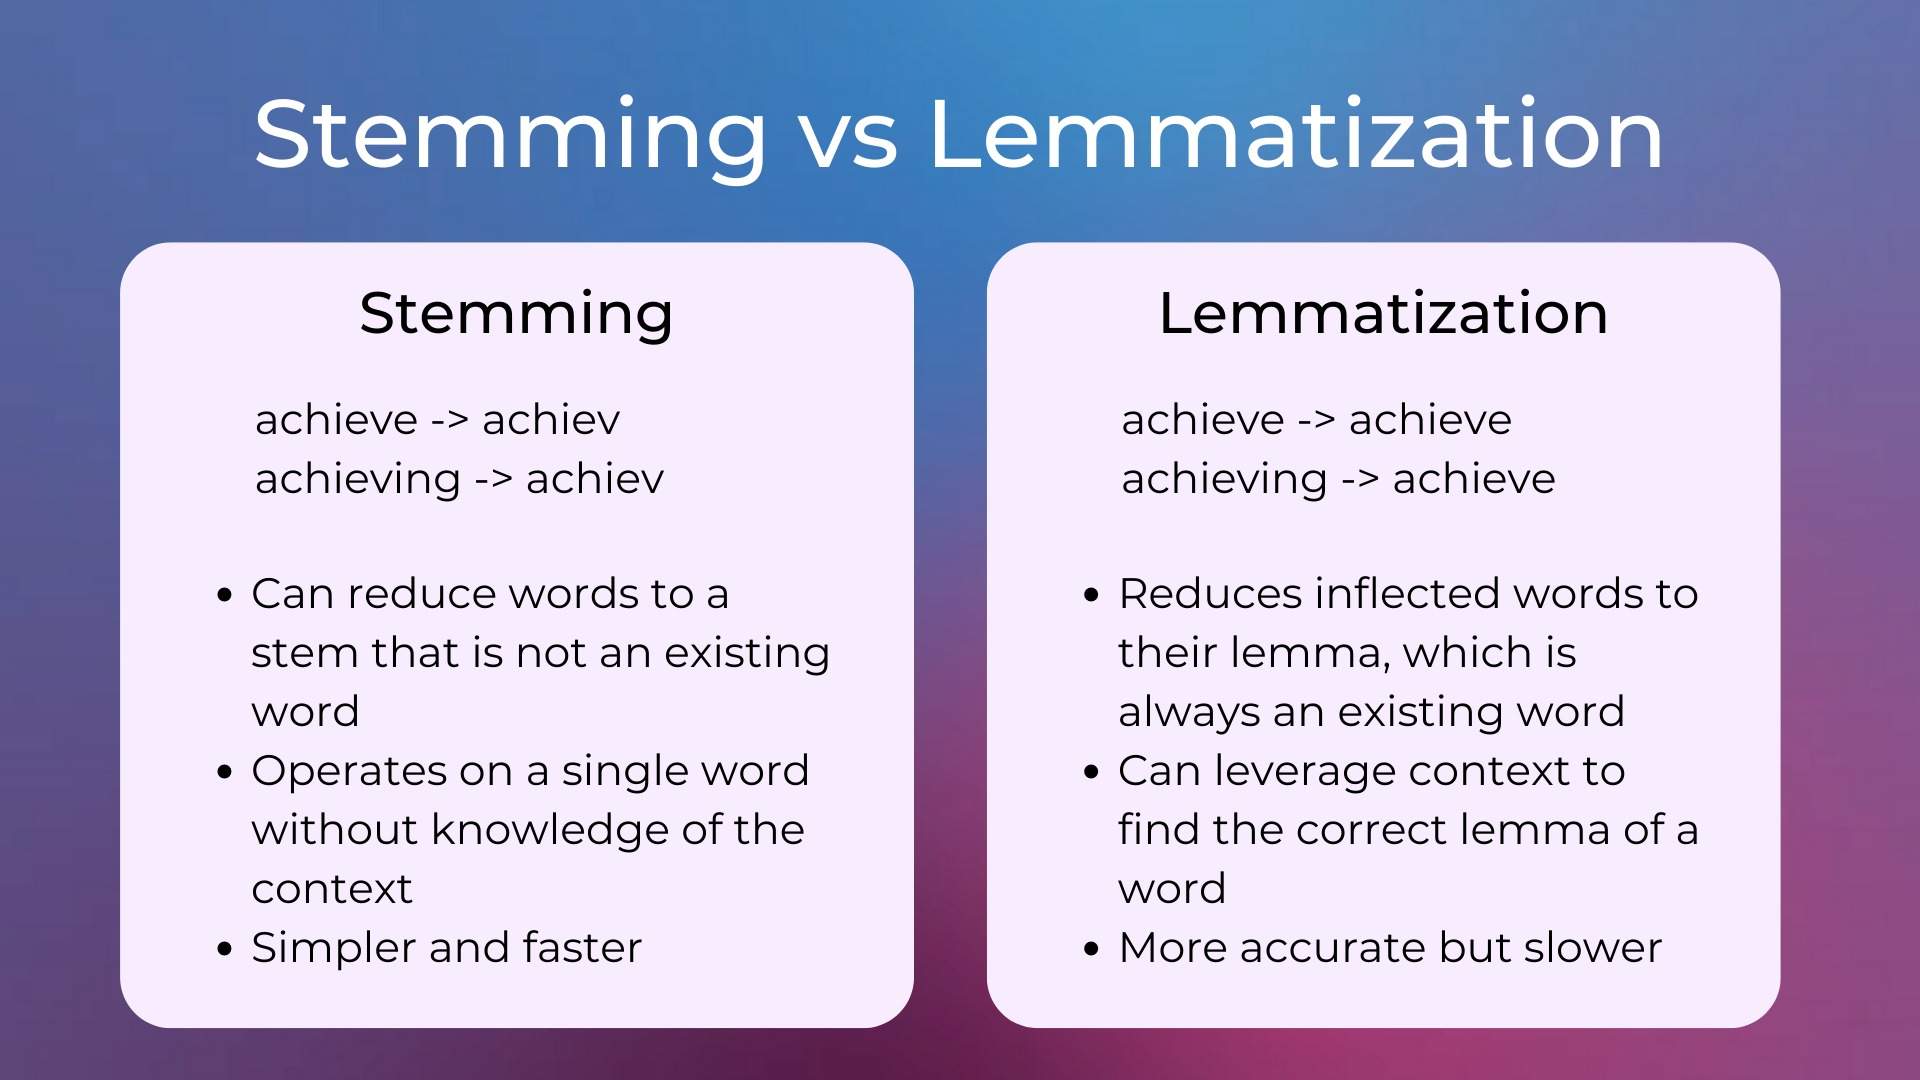

In [314]:
from IPython.display import Image
Image(filename=r'C:\Users\Hamidreza\OneDrive\Desktop\Patient Condition Classification\Dataset\stemming_vs_lemmatization.jpg')



In [19]:
# Import the WordNetLemmatizer class for lemmatization
from nltk.stem import WordNetLemmatizer
# Import the PorterStemmer class for stemming
from nltk.stem import PorterStemmer

# Create an instance of the PorterStemmer class
porter = PorterStemmer()
# Create an instance of the WordNetLemmatizer class
lemmatizer = WordNetLemmatizer()

#### The porter.stem method applies the Porter stemming algorithm, which reduces words to their word stem, base or root form (often this is not a word by itself). It's particularly useful in search engines for matching query terms to document terms. It should be noted that the lemmatizer object is created but not used in the provided code. If you wanted to use it, you would call lemmatizer.lemmatize("word") on the word you wish to lemmatize. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

In [20]:
# Use the PorterStemmer instance to stem the word "sportingly" and print the result
print(porter.stem("sportingly"))
# Use the PorterStemmer instance to stem the word "very" and print the result
print(porter.stem("very"))
# Use the PorterStemmer instance to stem the word "troubled" and print the result
print(porter.stem("troubled"))
print(porter.stem("damaged"))

sportingli
veri
troubl
damag


In [21]:
# Import the BeautifulSoup class from the BeautifulSoup4 library, used for parsing HTML and XML documents.
from bs4 import BeautifulSoup

# Import the 're' module, which provides support for regular expressions in Python.
import re


### This function, review_to_words, takes raw review text as input, cleans it by removing HTML tags, non-letter characters, converting to lowercase, removing stopwords, lemmatizing each word, and then returns the cleaned review as a single string of words separated by spaces. The function is then applied to the 'review' column of the DataFrame X to create a new 'review_clean' column, and the first few rows of the DataFrame are displayed.

In [29]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hamidreza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. Lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. Lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return (' '.join(lemmitize_words))


In [31]:
X['review_clean'] = X['review'].apply(review_to_words)



C:\Users\Hamidreza\AppData\Local\Temp\ipykernel_17788\2190934860.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [26]:
X.head(5)

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11     Depression   
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       review  \
2                                  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge._x000D_\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."   
3                                                                                                                                                                                                                                                                                                                                                            "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"   
9                                                           "I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger."   
11                                                                                                                                                                                                                                                                                                                   "I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them._x000D_\n_x000D_\nI only take Cymbalta now mostly for pain._x000D_\n_x000D_\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have be

## Creating features and Target Variable

In [34]:
from sklearn.model_selection import train_test_split

# Assuming X['review_clean'] and X['condition'] are properly populated.

# Select the 'review_clean' column from DataFrame X as features for modeling.
X_feat = X['review_clean']

# Select the 'condition' column from DataFrame X as the target variable for modeling.
y = X['condition']

# Split the dataset into training and test sets using the train_test_split function.
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, stratify=y, test_size=0.2, random_state=42)



In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



## Bag of words

In [36]:
# Instantiate the CountVectorizer, specifying to use English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit the CountVectorizer to the training data and transform it into a document-term matrix
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data into a document-term matrix
count_test = count_vectorizer.transform(X_test)

## Machine Learning Model: Multinomial Naive Bayes classifier 

accuracy: 0.970
Precision: 0.944
Recall: 0.931
Confusion matrix, without normalization


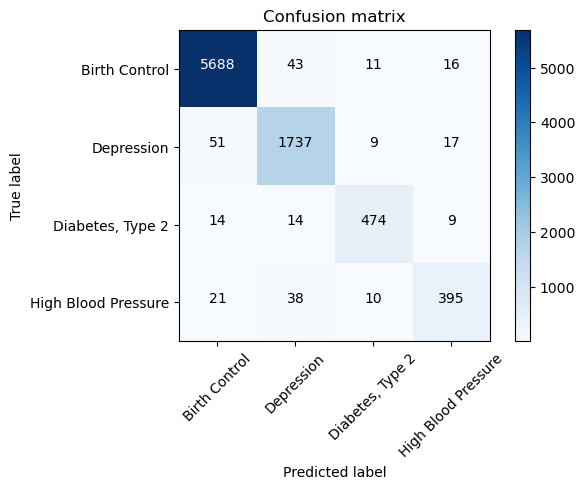

In [56]:
# Instantiate the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Fit the Naive Bayes classifier on the training data
mnb.fit(count_train, y_train)

# Predict the labels for the test set
pred = mnb.predict(count_test)

# Calculate the accuracy score of the predictions
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

# Calculating precision and recall
precision = metrics.precision_score(y_test, pred, average='macro')
recall = metrics.recall_score(y_test, pred, average='macro')
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

# Generate the confusion matrix from the test labels and predictions
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Call the function to plot the confusion matrix with the actual classes
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

## TFIDF

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Initializing the TfidfVectorizer with English stop words and a maximum document frequency of 0.8
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

# Transforming the training data into TF-IDF matrix
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)

# Transforming the test data into TF-IDF matrix
tfidf_test_2 = tfidf_vectorizer.transform(X_test)



## Machine Learning Model:  Multinomial Naive Bayes classifier using TF-IDF Vectorization

accuracy: 0.814
Precision: 0.939
Recall: 0.433
Confusion matrix, without normalization


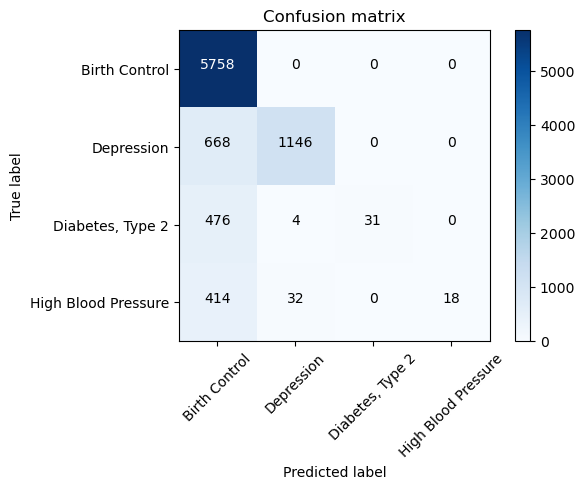

In [58]:
# Initializing the Multinomial Naive Bayes classifier
mnb_tf = MultinomialNB()

# Fitting the classifier to the TF-IDF training data
mnb_tf.fit(tfidf_train_2, y_train)

# Predicting the labels for the TF-IDF test data
pred = mnb_tf.predict(tfidf_test_2)

# Calculating the accuracy score of the model
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %.3f" % score)

# Calculating precision and recall
precision = metrics.precision_score(y_test, pred, average='macro')
recall = metrics.recall_score(y_test, pred, average='macro')
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

# Generating the confusion matrix from the true and predicted labels
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Function to plot the confusion matrix (assumed to be defined elsewhere)
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])


## Machine Learning Model : Passive Aggressive Classifier using TF-IDF Vectorization

accuracy: 0.981
Precision: 0.964
Recall: 0.950
Confusion matrix, without normalization


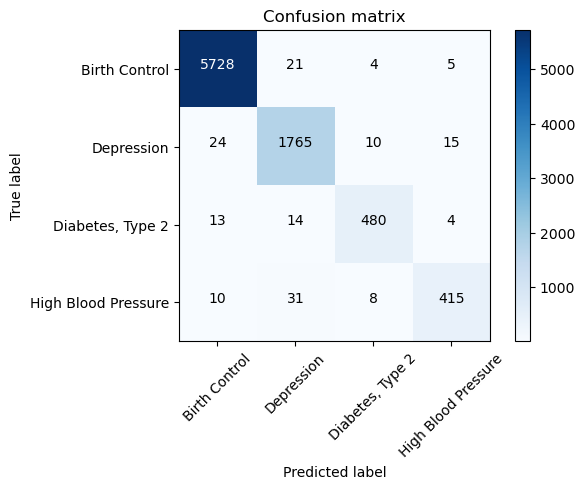

In [59]:


# Transforming the training data into TF-IDF matrix
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transforming the test data into TF-IDF matrix
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initializing the Passive Aggressive Classifier
pass_tf = PassiveAggressiveClassifier()



# Fitting the classifier to the TF-IDF training data
pass_tf.fit(tfidf_train, y_train)

# Predicting the labels for the TF-IDF test data
pred = pass_tf.predict(tfidf_test)

# Calculating the accuracy of the model's predictions
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %.3f" % score)

# Calculating precision and recall
precision = metrics.precision_score(y_test, pred, average='macro')
recall = metrics.recall_score(y_test, pred, average='macro')
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

# Generating the confusion matrix from the true and predicted labels
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Plotting the confusion matrix using the defined function
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])


## Machine Learning Model : Passive Aggressive Classifier using TF-IDF Vectorization with Bigrams

In [42]:
# Initializing the TF-IDF vectorizer to use bigrams and English stop words, with a max document frequency of 0.8
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))

# Transforming the training data into a TF-IDF matrix using the vectorizer
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)

# Transforming the test data into a TF-IDF matrix using the vectorizer
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)



accuracy: 0.984
Precision: 0.970
Recall: 0.951
Confusion matrix, without normalization


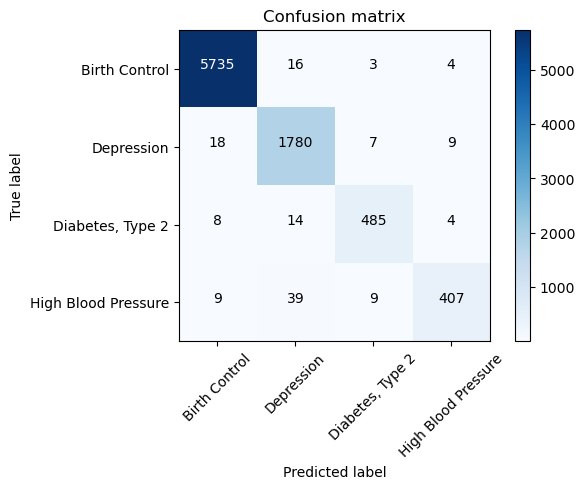

In [60]:
# Initializing the Passive Aggressive Classifier
pass_tf = PassiveAggressiveClassifier()

# Fitting the classifier on the TF-IDF bigram training data
pass_tf.fit(tfidf_train_2, y_train)

# Predicting the labels for the TF-IDF bigram test data
pred = pass_tf.predict(tfidf_test_2)

# Calculating the accuracy score of the model's predictions
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %.3f" % score)

# Calculating precision and recall
precision = metrics.precision_score(y_test, pred, average='macro')
recall = metrics.recall_score(y_test, pred, average='macro')
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

# Generating the confusion matrix from the true labels and predictions
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Plotting the confusion matrix using the defined function
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])


## Machine Learning Model : Passive Aggressive Classifier using TF-IDF Vectorization with Trigrams

accuracy: 0.983
Precision: 0.970
Recall: 0.950
Confusion matrix, without normalization


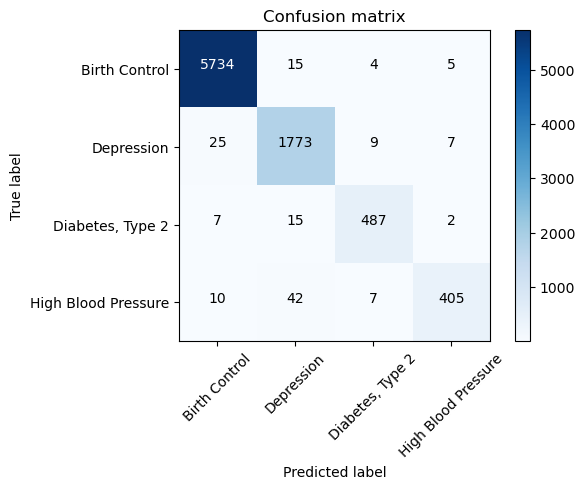

In [61]:
# Initializing the TF-IDF vectorizer to use trigrams and English stop words, with a max document frequency of 0.8
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))

# Transforming the training data into a TF-IDF matrix using the vectorizer, considering unigrams, bigrams, and trigrams
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)

# Transforming the test data into a TF-IDF matrix using the vectorizer, considering unigrams, bigrams, and trigrams
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

# Initializing the Passive Aggressive Classifier
pass_tf = PassiveAggressiveClassifier()

# Fitting the classifier on the TF-IDF trigram training data
pass_tf.fit(tfidf_train_3, y_train)

# Predicting the labels for the TF-IDF trigram test data
pred = pass_tf.predict(tfidf_test_3)

# Calculating the accuracy score of the model's predictions
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %.3f" % score)

# Calculating precision and recall
precision = metrics.precision_score(y_test, pred, average='macro')
recall = metrics.recall_score(y_test, pred, average='macro')
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

# Generating the confusion matrix from the true labels and predictions
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Plotting the confusion matrix using the defined function
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])


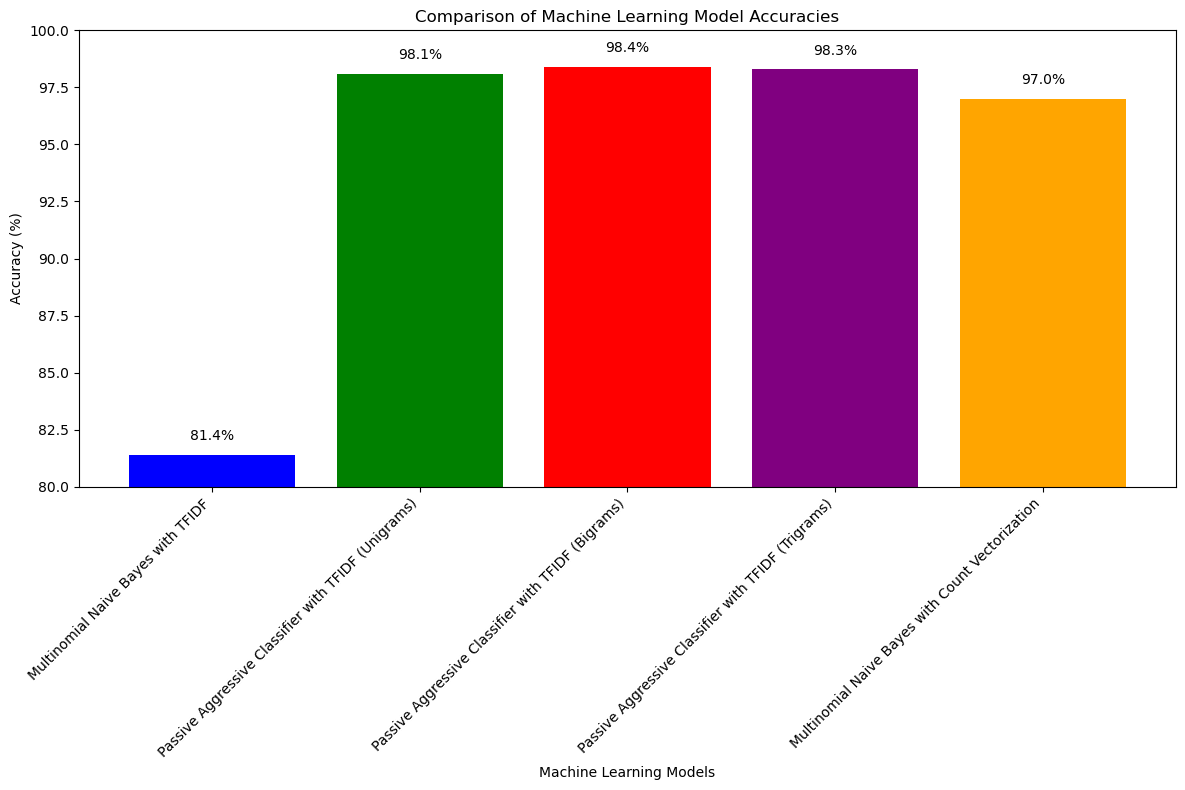

In [72]:
import matplotlib.pyplot as plt

# Names of the machine learning models based on the provided details
models = [
    'Multinomial Naive Bayes with TFIDF', 
    'Passive Aggressive Classifier with TFIDF (Unigrams)',
    'Passive Aggressive Classifier with TFIDF (Bigrams)',
    'Passive Aggressive Classifier with TFIDF (Trigrams)',
    'Multinomial Naive Bayes with Count Vectorization'
]

# Accuracy scores for each model
accuracies = [81.4, 98.1, 98.4, 98.3, 97.0]  # Percentages as provided

# Creating the bar chart with a larger height
plt.figure(figsize=(12, 8))  # increasing the height in the figure size
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])  # bar plot
plt.xlabel('Machine Learning Models')  # label for x-axis
plt.ylabel('Accuracy (%)')  # label for y-axis
plt.title('Comparison of Machine Learning Model Accuracies')  # title of the plot
plt.xticks(rotation=45, ha="right")  # rotate x-axis labels for better visibility
plt.ylim([80, 100])  # set the limits for y-axis to better highlight differences

# Adding the text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}%', ha='center', va='bottom')  # adjust 0.5 if necessary

plt.tight_layout()  # adjust layout to not cut off labels
plt.show()  # display the plot




### save both the vectorizer and the classifier

In [45]:
import joblib

# Saving
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(pass_tf, 'passive_aggressive_classifier.joblib')

# Loading
tfidf_vectorizer = joblib.load('tfidf_vectorizer.joblib')
pass_tf = joblib.load('passive_aggressive_classifier.joblib')

# Most Important Features

In [46]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    """
    This function prints the most informative features for a specified class label.
    These features are the ones that contribute most to the decision process of a linear classifier.
    """

    # Get the index of the class label from the classifier
    labelid = list(classifier.classes_).index(classlabel)

    # Retrieve the feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()


    # Get the coefficients from the classifier for the class label, 
    # and pair them with feature names
    coefs_with_fns = sorted(zip(classifier.coef_[labelid], feature_names))

    # Get the top n features with the highest coefficients for the class label
    topn = coefs_with_fns[:n]

    # Print out the class label, feature name, and coefficient for each feature
    for coef, feat in topn:
        print(classlabel, feat, coef)




In [334]:
# Call the function for different class labels to print out the most informative features
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'High Blood Pressure')
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Diabetes, Type 2')

Birth Control aliveness -2.1460052239147465
Birth Control problem -1.101798076295316
Birth Control spd -1.0625484273453194
Birth Control apnea -0.8224633976063851
Birth Control sinnce -0.6045396065747081
Birth Control subjective -0.5836110141953722
Birth Control assaulted -0.5518679992517355
Birth Control significantly -0.5364507531938281
Birth Control sink -0.4973634504107694
Birth Control fot -0.4921223270328872
Depression freeway -5.035304583578588
Depression problem -1.3741748330668009
Depression tiny -0.7494629491417396
Depression shine -0.6763330555680704
Depression packaged -0.6577331431708475
Depression addon -0.6560041998746026
Depression enforcement -0.6344540266968248
Depression proliferating -0.5965316854624364
Depression barley -0.5383325910478319
Depression correct -0.5187901214525186
High Blood Pressure freeway -1.684023453019646
High Blood Pressure problem -1.116461278446285
High Blood Pressure aliveness -1.00575462247801
High Blood Pressure commit -0.76074586556149
Hig

## Sample Prediction

In [47]:
X.tail()

condition  \
161273        Birth Control   
161278     Diabetes, Type 2   
161286           Depression   
161290  High Blood Pressure   
161291        Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            review  \
161273  "I have had the Nexplanon since Dec. 27, 2016 _x000D__x000D_\nI got my first period at the end of January and it lasted about a month and a half. In March of 2017 I didn&#039;t bleed for close to three weeks and then started bleeding again March 28th and have been bleeding every since. I have gained about 13 lbs so far since getting the birth control. Although for now the weight gain isn&#039;t a deal breaker for me but the bleeding is..  I am trying to be very patient to see how my body adjusts to the implant. It has been three months so far and I have my fingers crossed that my cycle will go away for awhile."   
161278                                                                                                                                                                                                                                                                                                                                                                                                             "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I  am losing so much weight. No side effects yet. Miracle medicine for me"   
161286                                                                                                                                                                                                                                                                                                                                                                                                   "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap."   
161290                                                                                                                                                                                            "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."   
161291                                                                                                                                                                                                                                    "This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;("   

                                                  

In [50]:


# Create a new TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Create a new model
model = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

# Save the newly trained vectorizer and model
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(model, 'passive_aggressive_classifier.joblib')

['passive_aggressive_classifier.joblib']

In [63]:


# Load the vectorizer and classifier
tfidf_vectorizer = joblib.load('tfidf_vectorizer.joblib')
pass_tf = joblib.load('passive_aggressive_classifier.joblib')

# Check the feature dimensions
print("Vectorizer features:", len(tfidf_vectorizer.get_feature_names_out()))
print("Model expected features:", pass_tf.n_features_in_)


Vectorizer features: 16072
Model expected features: 16072


In [64]:

# Assuming tfidf_vectorizer and pass_tf have been previously defined and trained

# Example text to classify
text = ["This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;("]
# Transform the text to the TF-IDF matrix
test = tfidf_vectorizer.transform(text)
# Predict the class for the transformed text
pred1 = pass_tf.predict(test)[0]
# Print the predicted class
print(pred1)


Birth Control


In [75]:
# Assuming tfidf_vectorizer and pass_tf have been previously defined and trained

# Example text to classify
text = ["I am 24 years old, female, 5&#039;1, 130 lbs. Treated for major depression and anxiety. I have aversions to junk food (I am normally health conscious unless I am really depressed), weight loss (12 lbs), dry mouth, lighter mood, easier to focus, more motivated, mountains turn into anthills, lower sex drive, sometimes get headaches. For me, the pros overwrite the cons - I went off of this for 6 months with no problems. No addiction or sickness. I am back on it and boy am I glad to feel happy again."]
# Transform the text to the TF-IDF matrix
test = tfidf_vectorizer.transform(text)
# Predict the class for the transformed text
pred2 = pass_tf.predict(test)[0]
# Print the predicted class
print(pred2)

Depression


In [76]:
# Assuming tfidf_vectorizer and pass_tf have been previously defined and trained

# Example text to classify
text = ["Been on trulicity for 4 months.  Seem to tolerate it very well, infrequent bouts of diarrhea,  some stomach upset but no episodes of throwing up.  Does not seem to handle carbs well, but minor carbacious meals will do better,   I supplement with about 40 units of Lantus insulin to help the A1c.  I will also do some occasional use of humolog if sugar is too high before next meal or arising in the morning. I have had about 7 pounds of weight loss."]
# Transform the text to the TF-IDF matrix
test = tfidf_vectorizer.transform(text)
# Predict the class for the transformed text
pred3 = pass_tf.predict(test)[0]
# Print the predicted class
print(pred3)

Diabetes, Type 2
